<a href="https://colab.research.google.com/github/aag112/LitView/blob/main/TCwithTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_colwidth", None)

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/workouts 2.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Sample data file - Sheet1.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/workouts.csv')
df = df2.append(df1)
df = df3.append(df)
df

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,Energy,AthleteComments,TimeTotalInHours,VelocityAverage,VelocityMax,CadenceAverage,CadenceMax,HeartRateAverage,HeartRateMax,TorqueAverage,TorqueMax,IF,TSS,HRZone1Minutes,HRZone2Minutes,HRZone3Minutes,HRZone4Minutes,HRZone5Minutes,HRZone6Minutes,HRZone7Minutes,HRZone8Minutes,HRZone9Minutes,HRZone10Minutes,PWRZone1Minutes,PWRZone2Minutes,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,PWRZone8Minutes,PWRZone9Minutes,PWRZone10Minutes,Rpe,Feeling
0,Monday Weekly Training Updates,Custom,"Monday Weekly Training Updates Monday's will be you weekly training update. Today, you will receive feedback from the last 8 days of training from Monday-Monday (unless you complete a late Monday evening ride today). Please let me know any restrictions for the upcoming 8 days before today begins. You can write in comments here on this custom entry (in Post-activity comments below) and also add manual entries on each day. For example, if you need off this Saturday or have a time restriction, please write that in today (in Post-activity comments below) or put a custom box for Saturday's TrainingPeaks box. In your custom entires, you can include anything you want including: 1. Travel 2. Work 3. Doctors appointments 4. Family 5. Vacation 6. Any other obligations outside of training",0.250000,NaN,2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Body Weight Exercise Routine (1 Set),Strength,"Body Weight Exercise Routine Shoot for 1 set of the following exercises: *Focus on good form by keeping back straight and abs tight for each exercise. Focus on 3-5 seconds for each rep (except superman and leg lift holds) ------------------------------------------------------- Warm Up: 15 minutes walk, jog, or stationary bike ------------------------------------------------------- Exercises: 1) 1 legged squats: 10-15 each leg 2) Pull-ups (max); you can do :30-:60 planks instead or both 3) Push-ups 10-25 4) Bridges 15-20; you can do 1-legged bridges for more of a challenge 5) Supeman's :30-:60 holds 6) Crunches 30-100; Bicycle Crunches 50-150 Leg raise holds (30 seconds-3 minutes) 7) Calf raises 10-15 each leg ------------------------------------------------------- Cool Down: I'd recommend rolling out your legs, back, and hips with a foam roller and doing stretches after your workout. You can also get a massage today.",0.750000,NaN,2021-02-01,"* Refer to client form document for details on body weight exercise routine. Also, see attached PDF file",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Full Body Stretch Routine,Custom,"Follow this full body stretch routine which should take 20-30 minutes. These are great full body stretches which are essential for full body fitness and recovery. If you have never done one of the stretches listed, go into it with ease and focus on good form and do not overstretch or go into any pain. The stretch routine should be relaxing and therapeutic If you are sore or tight it it will be great to loosen up your muscles. If you do not have time to get all of these stretches in, go ahead and pick out your favorite ones. These are my favorite: 1) Figure Four Stretch 2) 90/90 Stretch 3) Lunging Hip Flexor Stretch 4) Knee to Chest Stretch 5) Sphinx Pose 6) Extended Puppy Pose",0.416667,NaN,2021-02-01,A yoga mat with good thickness (your spine doesn't dig into the mat and feel the floor) is important for cushion for the spine and back. ------------------------------------------------------- Google Shared Link: https://drive.google.com/file/d/1leeAIBxGCGTbZoKQQ7gyuDkBY_1p3GX8/view?usp=sharing,NaN,NaN,NaN,NaN,NaN,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df['AthleteComments'].isna().sum()

744

In [4]:
col_list = ['AthleteComments', 'Rpe', 'Feeling']
df1 = df[col_list]

In [5]:
df1 = df1.dropna(subset=['AthleteComments'])
df1

,AthleteComments,Rpe,Feeling
5,"*02/03/2021 Steven Perezluha: Any ride today?* *02/04/2021 Chris Lutz: pushed a day, happy to be out and spin, but cold.* *02/04/2021 Steven Perezluha: Glad you got out there to spin the legs 👍*",NaN,NaN
8,*02/05/2021 Steven Perezluha: 60’ zone 1-2 power block: 215 watts/134bpm/87rpm 30’ peak right in the middle of the ride with 226 watts/138bpm/85rpm.* *02/05/2021 Steven Perezluha: Looks like you are recovering and should be set for this weekend!*,NaN,NaN
10,*02/05/2021 Steven Perezluha: Ready for tomorrow?* *02/05/2021 Steven Perezluha: I see there was a small stop down near 33/Laws Road... what happened here?* *02/05/2021 Steven Perezluha: First half block (40’) 226 watts/137bpm/88rpm Second half block (35’) 242 watts/148bpm/86rpm*,NaN,NaN
11,*02/05/2021 Steven Perezluha: Have you picked a spot yet? How does Silver Lake look for you?*,NaN,NaN
12,*02/06/2021 Steven Perezluha: 65’ Power Progression: 310 watts/152bpm/88rpm *first 5’: 259 watts 0-15’: 266 watts/131bpm/85rpm 15-30’: 294 watts/146bpm/88rpm 30-45’: 319 watts/156bpm/89rpm 45-60’: 344 watts/166bpm/89rpm 60-65’: 383 watts/176bpm/90rpm Average increase each 15’ was 29 watts and each 5 was ~10 watts/ 5 average watts each 5’. You ramped this effort well today! The target increase was ~ 4 watts which you beat!* *02/06/2021 Steven Perezluha: All Time Power Records Set Today: 30’: 342 watts 40’: 333 watts 45’: 329 watts 60’: 316 watts (2nd best ever: best ever 323 watts 7/17/11 Race) 65’: 310 watts*,NaN,NaN
...,...,...,...
187,*05/05/2021 Becky DiSorbo: Better bike route. still a pain with lights but was pretty good with timing. Messed up route on First one.* *05/05/2021 Becky DiSorbo: Power in edge file which didn’t have the workout in it so used watch for workout and edge to get power.* *05/05/2021 Becky DiSorbo: Looks Like Watch picked up power*,4.0,3.0
191,*05/06/2021 Becky DiSorbo: Runs felt strong.* *05/06/2021 Becky DiSorbo: Brick done out of car.* *05/06/2021 Becky DiSorbo: Had to put my bike in back and lock car after each interval and didn’t have my tri run shoes so was tying my shoelaces. Anyway it was doable.* *05/06/2021 Becky DiSorbo: My left glute is sore though* *05/06/2021 Becky DiSorbo: Sorry no I mean my right glute*,6.0,5.0
192,*05/06/2021 Becky DiSorbo: Bike portion of brick. Found a semi descent spot but some lights going into the base which was annoying.* *05/06/2021 Becky DiSorbo: Nice and flat worked at keeping power above 200.*,NaN,NaN
202,*05/08/2021 Becky DiSorbo: Lights at various points. Some friendly cyclists. Passed a group then they stayed on my wheel which pushed me.... some good hills on this ride.*,5.0,5.0


In [6]:
df1['Rpe'].mean()

5.556818181818182

In [7]:
#filling in null rpe values with mean value
#df1['Rpe'].fillna(5.0, inplace = True)
#df1

,AthleteComments,Rpe,Feeling
5,"*02/03/2021 Steven Perezluha: Any ride today?* *02/04/2021 Chris Lutz: pushed a day, happy to be out and spin, but cold.* *02/04/2021 Steven Perezluha: Glad you got out there to spin the legs 👍*",5.0,NaN
8,*02/05/2021 Steven Perezluha: 60’ zone 1-2 power block: 215 watts/134bpm/87rpm 30’ peak right in the middle of the ride with 226 watts/138bpm/85rpm.* *02/05/2021 Steven Perezluha: Looks like you are recovering and should be set for this weekend!*,5.0,NaN
10,*02/05/2021 Steven Perezluha: Ready for tomorrow?* *02/05/2021 Steven Perezluha: I see there was a small stop down near 33/Laws Road... what happened here?* *02/05/2021 Steven Perezluha: First half block (40’) 226 watts/137bpm/88rpm Second half block (35’) 242 watts/148bpm/86rpm*,5.0,NaN
11,*02/05/2021 Steven Perezluha: Have you picked a spot yet? How does Silver Lake look for you?*,5.0,NaN
12,*02/06/2021 Steven Perezluha: 65’ Power Progression: 310 watts/152bpm/88rpm *first 5’: 259 watts 0-15’: 266 watts/131bpm/85rpm 15-30’: 294 watts/146bpm/88rpm 30-45’: 319 watts/156bpm/89rpm 45-60’: 344 watts/166bpm/89rpm 60-65’: 383 watts/176bpm/90rpm Average increase each 15’ was 29 watts and each 5 was ~10 watts/ 5 average watts each 5’. You ramped this effort well today! The target increase was ~ 4 watts which you beat!* *02/06/2021 Steven Perezluha: All Time Power Records Set Today: 30’: 342 watts 40’: 333 watts 45’: 329 watts 60’: 316 watts (2nd best ever: best ever 323 watts 7/17/11 Race) 65’: 310 watts*,5.0,NaN
...,...,...,...
187,*05/05/2021 Becky DiSorbo: Better bike route. still a pain with lights but was pretty good with timing. Messed up route on First one.* *05/05/2021 Becky DiSorbo: Power in edge file which didn’t have the workout in it so used watch for workout and edge to get power.* *05/05/2021 Becky DiSorbo: Looks Like Watch picked up power*,4.0,3.0
191,*05/06/2021 Becky DiSorbo: Runs felt strong.* *05/06/2021 Becky DiSorbo: Brick done out of car.* *05/06/2021 Becky DiSorbo: Had to put my bike in back and lock car after each interval and didn’t have my tri run shoes so was tying my shoelaces. Anyway it was doable.* *05/06/2021 Becky DiSorbo: My left glute is sore though* *05/06/2021 Becky DiSorbo: Sorry no I mean my right glute*,6.0,5.0
192,*05/06/2021 Becky DiSorbo: Bike portion of brick. Found a semi descent spot but some lights going into the base which was annoying.* *05/06/2021 Becky DiSorbo: Nice and flat worked at keeping power above 200.*,5.0,NaN
202,*05/08/2021 Becky DiSorbo: Lights at various points. Some friendly cyclists. Passed a group then they stayed on my wheel which pushed me.... some good hills on this ride.*,5.0,5.0


In [8]:
df = df1
df.reset_index(inplace=True)
df

,index,AthleteComments,Rpe,Feeling
0,5,"*02/03/2021 Steven Perezluha: Any ride today?* *02/04/2021 Chris Lutz: pushed a day, happy to be out and spin, but cold.* *02/04/2021 Steven Perezluha: Glad you got out there to spin the legs 👍*",5.0,NaN
1,8,*02/05/2021 Steven Perezluha: 60’ zone 1-2 power block: 215 watts/134bpm/87rpm 30’ peak right in the middle of the ride with 226 watts/138bpm/85rpm.* *02/05/2021 Steven Perezluha: Looks like you are recovering and should be set for this weekend!*,5.0,NaN
2,10,*02/05/2021 Steven Perezluha: Ready for tomorrow?* *02/05/2021 Steven Perezluha: I see there was a small stop down near 33/Laws Road... what happened here?* *02/05/2021 Steven Perezluha: First half block (40’) 226 watts/137bpm/88rpm Second half block (35’) 242 watts/148bpm/86rpm*,5.0,NaN
3,11,*02/05/2021 Steven Perezluha: Have you picked a spot yet? How does Silver Lake look for you?*,5.0,NaN
4,12,*02/06/2021 Steven Perezluha: 65’ Power Progression: 310 watts/152bpm/88rpm *first 5’: 259 watts 0-15’: 266 watts/131bpm/85rpm 15-30’: 294 watts/146bpm/88rpm 30-45’: 319 watts/156bpm/89rpm 45-60’: 344 watts/166bpm/89rpm 60-65’: 383 watts/176bpm/90rpm Average increase each 15’ was 29 watts and each 5 was ~10 watts/ 5 average watts each 5’. You ramped this effort well today! The target increase was ~ 4 watts which you beat!* *02/06/2021 Steven Perezluha: All Time Power Records Set Today: 30’: 342 watts 40’: 333 watts 45’: 329 watts 60’: 316 watts (2nd best ever: best ever 323 watts 7/17/11 Race) 65’: 310 watts*,5.0,NaN
...,...,...,...,...
952,187,*05/05/2021 Becky DiSorbo: Better bike route. still a pain with lights but was pretty good with timing. Messed up route on First one.* *05/05/2021 Becky DiSorbo: Power in edge file which didn’t have the workout in it so used watch for workout and edge to get power.* *05/05/2021 Becky DiSorbo: Looks Like Watch picked up power*,4.0,3.0
953,191,*05/06/2021 Becky DiSorbo: Runs felt strong.* *05/06/2021 Becky DiSorbo: Brick done out of car.* *05/06/2021 Becky DiSorbo: Had to put my bike in back and lock car after each interval and didn’t have my tri run shoes so was tying my shoelaces. Anyway it was doable.* *05/06/2021 Becky DiSorbo: My left glute is sore though* *05/06/2021 Becky DiSorbo: Sorry no I mean my right glute*,6.0,5.0
954,192,*05/06/2021 Becky DiSorbo: Bike portion of brick. Found a semi descent spot but some lights going into the base which was annoying.* *05/06/2021 Becky DiSorbo: Nice and flat worked at keeping power above 200.*,5.0,NaN
955,202,*05/08/2021 Becky DiSorbo: Lights at various points. Some friendly cyclists. Passed a group then they stayed on my wheel which pushed me.... some good hills on this ride.*,5.0,5.0


In [9]:
df = df.drop(columns = ['index', 'Feeling'])
df

,AthleteComments,Rpe,Feeling
0,"*02/03/2021 Steven Perezluha: Any ride today?* *02/04/2021 Chris Lutz: pushed a day, happy to be out and spin, but cold.* *02/04/2021 Steven Perezluha: Glad you got out there to spin the legs 👍*",5.0,NaN
1,*02/05/2021 Steven Perezluha: 60’ zone 1-2 power block: 215 watts/134bpm/87rpm 30’ peak right in the middle of the ride with 226 watts/138bpm/85rpm.* *02/05/2021 Steven Perezluha: Looks like you are recovering and should be set for this weekend!*,5.0,NaN
2,*02/05/2021 Steven Perezluha: Ready for tomorrow?* *02/05/2021 Steven Perezluha: I see there was a small stop down near 33/Laws Road... what happened here?* *02/05/2021 Steven Perezluha: First half block (40’) 226 watts/137bpm/88rpm Second half block (35’) 242 watts/148bpm/86rpm*,5.0,NaN
3,*02/05/2021 Steven Perezluha: Have you picked a spot yet? How does Silver Lake look for you?*,5.0,NaN
4,*02/06/2021 Steven Perezluha: 65’ Power Progression: 310 watts/152bpm/88rpm *first 5’: 259 watts 0-15’: 266 watts/131bpm/85rpm 15-30’: 294 watts/146bpm/88rpm 30-45’: 319 watts/156bpm/89rpm 45-60’: 344 watts/166bpm/89rpm 60-65’: 383 watts/176bpm/90rpm Average increase each 15’ was 29 watts and each 5 was ~10 watts/ 5 average watts each 5’. You ramped this effort well today! The target increase was ~ 4 watts which you beat!* *02/06/2021 Steven Perezluha: All Time Power Records Set Today: 30’: 342 watts 40’: 333 watts 45’: 329 watts 60’: 316 watts (2nd best ever: best ever 323 watts 7/17/11 Race) 65’: 310 watts*,5.0,NaN
...,...,...,...
952,*05/05/2021 Becky DiSorbo: Better bike route. still a pain with lights but was pretty good with timing. Messed up route on First one.* *05/05/2021 Becky DiSorbo: Power in edge file which didn’t have the workout in it so used watch for workout and edge to get power.* *05/05/2021 Becky DiSorbo: Looks Like Watch picked up power*,4.0,3.0
953,*05/06/2021 Becky DiSorbo: Runs felt strong.* *05/06/2021 Becky DiSorbo: Brick done out of car.* *05/06/2021 Becky DiSorbo: Had to put my bike in back and lock car after each interval and didn’t have my tri run shoes so was tying my shoelaces. Anyway it was doable.* *05/06/2021 Becky DiSorbo: My left glute is sore though* *05/06/2021 Becky DiSorbo: Sorry no I mean my right glute*,6.0,5.0
954,*05/06/2021 Becky DiSorbo: Bike portion of brick. Found a semi descent spot but some lights going into the base which was annoying.* *05/06/2021 Becky DiSorbo: Nice and flat worked at keeping power above 200.*,5.0,NaN
955,*05/08/2021 Becky DiSorbo: Lights at various points. Some friendly cyclists. Passed a group then they stayed on my wheel which pushed me.... some good hills on this ride.*,5.0,5.0


In [13]:
#df['Rpe'] = pd.to_numeric(df['Rpe'])

In [10]:
conditions = [(df['Rpe'] < 4.00),
              (df['Rpe'] >= 4.00) & (df['Rpe'] <= 6.00),
              (df['Rpe'] >= 7.00)]

values = ['Underworked','Balanced', 'Overworked']
df['Sentiment'] = np.select(conditions, values)

In [11]:
df['Rpe'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


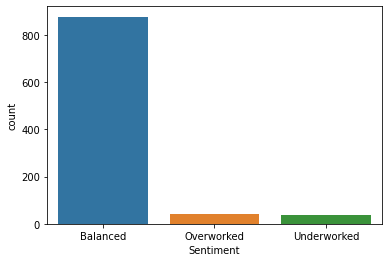

In [12]:
import seaborn as sns
sns.countplot(df['Sentiment'])

In [13]:
import nltk 
from bs4 import BeautifulSoup

In [14]:
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

In [15]:
import re
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [16]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [17]:
df['AthleteComments']=df['AthleteComments'].apply(denoise_text)

In [18]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [ ]:
def remove_dates(text, remove_digits=True):
    pattern=r"\b\d+\b"
    text=re.sub(pattern,'',text)
    return text

df['AthleteComments']=df['AthleteComments'].apply(remove_dates)   

In [19]:
def Convert_to_bin(text, remove_digits=True):
    if text=='Overworked':
      text= 1
    elif text=='Underworked':
      text=0
    elif text=='Balanced':
      text=2
    return text

In [35]:
#I see urls in the text and we don't need any of that in our model
import re

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

In [20]:
df['AthleteComments']=df['AthleteComments'].apply(remove_special_characters)
df['Sentiment']=df['Sentiment'].apply(Convert_to_bin)

In [37]:
df["AthleteComments"] = df.AthleteComments.map(remove_URL)

In [21]:
X=df['AthleteComments'].values
Y=df['Sentiment'].values

In [23]:
df = df.drop(columns = ['Feeling'])
df

,AthleteComments,Rpe,Sentiment
0,02032021 Steven Perezluha Any ride today 02042021 Chris Lutz pushed a day happy to be out and spin but cold 02042021 Steven Perezluha Glad you got out there to spin the legs,5.0,2
1,02052021 Steven Perezluha 60 zone 12 power block 215 watts134bpm87rpm 30 peak right in the middle of the ride with 226 watts138bpm85rpm 02052021 Steven Perezluha Looks like you are recovering and should be set for this weekend,5.0,2
2,02052021 Steven Perezluha Ready for tomorrow 02052021 Steven Perezluha I see there was a small stop down near 33Laws Road what happened here 02052021 Steven Perezluha First half block 40 226 watts137bpm88rpm Second half block 35 242 watts148bpm86rpm,5.0,2
3,02052021 Steven Perezluha Have you picked a spot yet How does Silver Lake look for you,5.0,2
4,02062021 Steven Perezluha 65 Power Progression 310 watts152bpm88rpm first 5 259 watts 015 266 watts131bpm85rpm 1530 294 watts146bpm88rpm 3045 319 watts156bpm89rpm 4560 344 watts166bpm89rpm 6065 383 watts176bpm90rpm Average increase each 15 was 29 watts and each 5 was 10 watts 5 average watts each 5 You ramped this effort well today The target increase was 4 watts which you beat 02062021 Steven Perezluha All Time Power Records Set Today 30 342 watts 40 333 watts 45 329 watts 60 316 watts 2nd best ever best ever 323 watts 71711 Race 65 310 watts,5.0,2
...,...,...,...
952,05052021 Becky DiSorbo Better bike route still a pain with lights but was pretty good with timing Messed up route on First one 05052021 Becky DiSorbo Power in edge file which didnt have the workout in it so used watch for workout and edge to get power 05052021 Becky DiSorbo Looks Like Watch picked up power,4.0,2
953,05062021 Becky DiSorbo Runs felt strong 05062021 Becky DiSorbo Brick done out of car 05062021 Becky DiSorbo Had to put my bike in back and lock car after each interval and didnt have my tri run shoes so was tying my shoelaces Anyway it was doable 05062021 Becky DiSorbo My left glute is sore though 05062021 Becky DiSorbo Sorry no I mean my right glute,6.0,2
954,05062021 Becky DiSorbo Bike portion of brick Found a semi descent spot but some lights going into the base which was annoying 05062021 Becky DiSorbo Nice and flat worked at keeping power above 200,5.0,2
955,05082021 Becky DiSorbo Lights at various points Some friendly cyclists Passed a group then they stayed on my wheel which pushed me some good hills on this ride,5.0,2


In [24]:
print((df.Sentiment == 2).sum())
print((df.Sentiment == 1).sum())
print((df.Sentiment == 0).sum())

876
42
39


In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("english"))

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
df['AthleteComments'] = df.AthleteComments.map(remove_stopwords)
df.AthleteComments

0                                                                                                                                                                                                                                                                                                                                                                                 02032021 steven perezluha ride today 02042021 chris lutz pushed day happy spin cold 02042021 steven perezluha glad got spin legs
1                                                                                                                                                                                                                                                                                                                                 02052021 steven perezluha 60 zone 12 power block 215 watts134bpm87rpm 30 peak right middle ride 226 watts138bpm85rpm 02052021 steven perezluha looks like recovering set weekend
2 

In [28]:
# Split dataset into training and validation set
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
train_sentences = train_df.AthleteComments.to_numpy()
train_labels = train_df.Sentiment.to_numpy()
val_sentences = val_df.AthleteComments.to_numpy()
val_labels = val_df.Sentiment.to_numpy()

In [29]:
train_sentences.shape, val_sentences.shape

((765,), (192,))

In [30]:
import tensorflow as tf
from tensorflow import keras

In [32]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.AthleteComments)

In [33]:
len(counter)

3881

In [34]:
counter

Counter({'02032021': 1,
         'steven': 131,
         'perezluha': 131,
         'ride': 131,
         'today': 198,
         '02042021': 2,
         'chris': 43,
         'lutz': 43,
         'pushed': 8,
         'day': 67,
         'happy': 3,
         'spin': 9,
         'cold': 41,
         'glad': 4,
         'got': 51,
         'legs': 110,
         '02052021': 6,
         '60': 10,
         'zone': 52,
         '12': 23,
         'power': 106,
         'block': 13,
         '215': 3,
         'watts134bpm87rpm': 1,
         '30': 89,
         'peak': 18,
         'right': 61,
         'middle': 13,
         '226': 2,
         'watts138bpm85rpm': 1,
         'looks': 27,
         'like': 99,
         'recovering': 1,
         'set': 66,
         'weekend': 15,
         'ready': 14,
         'tomorrow': 38,
         'see': 37,
         'small': 7,
         'stop': 38,
         'near': 24,
         '33laws': 1,
         'road': 63,
         'happened': 2,
         'first': 93,


In [38]:
counter.most_common(5)

[('becky', 1253),
 ('disorbo', 1252),
 ('easy', 424),
 ('felt', 384),
 ('good', 316)]

In [40]:
num_unique_words = len(counter)

In [41]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [43]:
# each word has unique index
word_index = tokenizer.word_index

In [44]:
word_index

{'becky': 1,
 'disorbo': 2,
 'felt': 3,
 'good': 4,
 'easy': 5,
 'watts': 6,
 'swim': 7,
 'today': 8,
 'nick': 9,
 'radkewich': 10,
 'back': 11,
 '50': 12,
 'min': 13,
 '2': 14,
 'steven': 15,
 'perezluha': 16,
 'run': 17,
 'effort': 18,
 '3': 19,
 'last': 20,
 'bike': 21,
 'little': 22,
 'ride': 23,
 'warm': 24,
 'legs': 25,
 'one': 26,
 '4': 27,
 'mins': 28,
 'miles': 29,
 '1': 30,
 'week': 31,
 'power': 32,
 'fast': 33,
 'like': 34,
 'mile': 35,
 'pretty': 36,
 'get': 37,
 'went': 38,
 'first': 39,
 '100': 40,
 '5': 41,
 'bit': 42,
 'pace': 43,
 'didnt': 44,
 'strong': 45,
 'hard': 46,
 'great': 47,
 '200': 48,
 'time': 49,
 'intervals': 50,
 'sore': 51,
 'workout': 52,
 'work': 53,
 '25': 54,
 'recovery': 55,
 'left': 56,
 '30': 57,
 'road': 58,
 'day': 59,
 'feel': 60,
 'set': 61,
 '10': 62,
 'think': 63,
 'rest': 64,
 'right': 65,
 'avg': 66,
 'nice': 67,
 'end': 68,
 'hill': 69,
 'way': 70,
 'better': 71,
 'watch': 72,
 'start': 73,
 'best': 74,
 'around': 75,
 '300': 76,
 'also

In [45]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [46]:
print(train_sentences[10:15])
print(train_sequences[10:15])

['02112021 chris lutz challenging interesting try find tempo feel bit behind pace expected long way go yet'
 '02122021 steven perezluha 1st 21 ramp 317 watts163bpm88rpm 05 272 watts 510 300 watts 1015 323 watts 1520 346 watts 2021444 watts final 11 345 watts 2nd 21 ramp 320 watts167bpm87rpm 05 275 watts 510 304 watts 1015 326 watts 1520 347 watts 2021 452 watts final 20 323 watts final 11 346 watts final 5 370 watts 02122021 steven perezluha final 6 effort good push like final 25 miles poly tt sunday good work make small change make 22 guess garmin loaded 21 version big deal'
 '02142021 steven perezluha good loosen legs today'
 '02152021 steven perezluha great work today 02152021 steven perezluha 80 mile florida polytechnic tt results 1750 2692mph 355 watts175bpm95 rpm pacing 0275 miles 355 watts167bpm97rpm 265mph 27569 miles 352 watts178bpm94rpm 267mph 6980 miles 384 watts179bpm95rpm 280mph biggest takeaway today improvement riding aero like tt bike forearms bars'
 '02172021 steven pe

In [47]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 50

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((765, 50), (192, 50))

In [48]:
train_padded[10]

array([ 650,   80,   81,  790, 1958,  304,  558,  153,   60,   42,  394,
         43, 1332,  137,   70,  121,  359,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [49]:
#check padding
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

02112021 chris lutz challenging interesting try find tempo feel bit behind pace expected long way go yet
[650, 80, 81, 790, 1958, 304, 558, 153, 60, 42, 394, 43, 1332, 137, 70, 121, 359]
[ 650   80   81  790 1958  304  558  153   60   42  394   43 1332  137
   70  121  359    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [51]:
BUFFER_SIZE = 765 #length of train set
BATCH_SIZE = 32 #need to see which works best when fine-tuning

In [54]:
#train_dataset = train_df.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE,
#                                padded_shapes=train_padded)

#test_dataset = val_df.padded_batch(BATCH_SIZE,
#                                padded_shapes=val_padded)

In [55]:
from tensorflow.keras import layers

In [59]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(num_unique_words, 32, input_length=max_length),
                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(3, activation='sigmoid')]) #the int for this layer must change depending on how many labels are present

In [62]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(1e-4) #stochastic gradient descent method well suited for large datasets
metrics = ['sparse_categorical_accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [63]:
model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/20
24/24 - 5s - loss: 0.2382 - sparse_categorical_accuracy: 0.9229 - val_loss: 0.4996 - val_sparse_categorical_accuracy: 0.8854
Epoch 2/20
24/24 - 1s - loss: 0.2262 - sparse_categorical_accuracy: 0.9229 - val_loss: 0.4910 - val_sparse_categorical_accuracy: 0.8854
Epoch 3/20
24/24 - 1s - loss: 0.2123 - sparse_categorical_accuracy: 0.9229 - val_loss: 0.5189 - val_sparse_categorical_accuracy: 0.8854
Epoch 4/20
24/24 - 1s - loss: 0.1989 - sparse_categorical_accuracy: 0.9229 - val_loss: 0.4878 - val_sparse_categorical_accuracy: 0.8854
Epoch 5/20
24/24 - 1s - loss: 0.1838 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.5492 - val_sparse_categorical_accuracy: 0.8854
Epoch 6/20
24/24 - 1s - loss: 0.1626 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.6334 - val_sparse_categorical_accuracy: 0.8854
Epoch 7/20
24/24 - 1s - loss: 0.1358 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.7117 - val_sparse_categorical_accuracy: 0.8854
Epoch 8/20
24/24 - 1s - loss: 0.1084 - sparse_ca

In [72]:
new_entry = ['sore tired dead']
seq = tokenizer.texts_to_sequences(new_entry)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['Underworked', 'Overworked', 'Balanced']
print(pred, labels[np.argmax(pred)])

[[0.07810017 0.06245247 0.9769887 ]] Balanced


# Recurrent Neural networks like LSTM generally have the problem of overfitting.

Dropout can be applied between layers using the Dropout Keras layer. We can do this easily by adding new Dropout layers between the Embedding and LSTM layers and the LSTM and Dense output layers.